In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import gzip      # this module is used to read and apply functions directly on zip files , it's used to compress the file
import simplejson  # it is simple encoder and decoder of JSON files for python

%matplotlib inline

# META INFORMATION OF THE DATASETS

All category datsets contains the same attributes

### product/productId: it gives the productid of the product in each category
### product/title: this attribute gives the title of the product in the category
### product/price: gives the price of the product 
### review/userId: the userid of the user who bought the corresponding product
### review/profileName: profile name of the user account
### review/helpfulness: people's rating of how much proportion the product is helpful
### review/score: rating given by the user to the corresponding product
### review/time: The time when the user gave the review to the product bought
### review/summary: just a summary of the product
### review/text: the whole text given by the user to the corresponding product

# Objective of the Project

The overall objective of the project is to build an app with a simple UI. The app will allow the user to 
choose between 5 categories of products  On choosing the category of product, recommendations are displayed based on user based similarity .
The UI is designed based on the FASTAPI

The data required for this project is taken from the website (http://snap.stanford.edu/data/web-Amazon-links.html). It contains	user reviews	(numerical	rating	and	textual	comment)	towards	amazon	products	on	24	product	categories(e.g.,	cell	phones, clothing,	beauty,	etc.),	and	there is	an	independent	dataset	for	each	product	category. We will select 5 product categories in this project i.e., Arts.txt.gz, Cell_Phones_&_Accessories.txt.gz, office_products.txt.gz, video_games.txt.gz, electronics.txt.gz. On choosing the category of product, recommendations are displayed based on user based similarity(Collaborative Filtering).

## Parsing the data

In [2]:
def parse(filename):
    f = gzip.open(filename, 'r')
    entry = {}
    for l in f:
        l = l.strip()
        l = l.decode()
        colonPos = l.find(':')
        if colonPos == -1:
            yield entry
            entry = {}
            continue
        eName = l[:colonPos]
        rest = l[colonPos+2:]
        entry[eName] = rest
    yield entry
    
def getDF(path):
    i = 0
    df = {}
    for d in parse(path):
        df[i] = d
        i += 1
    return pd.DataFrame.from_dict(df, orient='index')    # converting into python DataFrame

In [3]:
import contractions   # importing contractions

In [4]:
contractions={
    "ain't": "are not",
    "aren't": "are not",
    "can't": "cannot",
    "can't've": "cannot have",
    "'cause": "because",
    "could've": "could have",
    "couldn't": "could not",
    "couldn't've": "could not have",
    "didn't": "did not",
    "doesn't": "does not",
    "don't": "do not",
    "hadn't": "had not",
    "hadn't've": "had not have",
    "hasn't": "has not",
    "haven't": "have not",
    "he'd": "he would",
    "he'd've": "he would have",
    "he'll": "he will",
    "he'll've": "he will have",
    "he's": "he is",
    "how'd": "how did",
    "how're": "how are",
    "how'd'y": "how do you",
    "how'll": "how will",
    "how's": "how is",
    "I'd": "I would",
    "I'd've": "I would have",
    "I'll": "I will",
    "I'll've": "I will have",
    "I'm": "I am",
    "I've": "I have",
    "isn't": "is not",
    "it'd": "it would",
    "it'd've": "it would have",
    "it'll": "it will",
    "it'll've": "it will have",
    "it's": "it is",
    "let's": "let us",
    "ma'am": "madam",
    "mayn't": "may not",
    "might've": "might have",
    "mightn't": "might not",
    "mightn't've": "might not have",
    "must've": "must have",
    "mustn't": "must not",
    "mustn't've": "must not have",
    "needn't": "need not",
    "needn't've": "need not have",
    "o'clock": "of the clock",
    "oughtn't": "ought not",
    "oughtn't've": "ought not have",
    "shan't": "shall not",
    "sha'n't": "shall not",
    "shan't've": "shall not have",
    "she'd": "she would",
    "she'd've": "she would have",
    "she'll": "she will",
    "she'll've": "she will have",
    "she's": "she is",
    "should've": "should have",
    "shouldn't": "should not",
    "shouldn't've": "should not have",
    "so've": "so have",
    "so's": "so is",
    "that'd": "that would",
    "that'd've": "that would have",
    "that's": "that is",
    "there'd": "there would",
    "there'd've": "there would have",
    "there's": "there is",
    "they'd": "they would",
    "they'd've": "they would have",
    "they'll": "they will",
    "they'll've": "they will have",
    "they're": "they are",
    "they've": "they have",
    "to've": "to have",
    "wasn't": "was not",
    "we'd": "we would",
    "we'd've": "we would have",
    "we'll": "we will",
    "we'll've": "we will have",
    "we're": "we are",
    "we've": "we have",
    "weren't": "were not",
    "what'll": "what will",
    "what'll've": "what will have",
    "what're": "what are",
    "what's": "what is",
    "what've": "what have",
    "when's": "when is",
    "when've": "when have",
    "where'd": "where did",
    "where's": "where is",
    "where've": "where have",
    "who'll": "who will",
    "who'll've": "who will have",
    "who's": "who is",
    "who've": "who have",
    "why's": "why is",
    "why've": "why have",
    "will've": "will have",
    "won't": "will not",
    "won't've": "will not have",
    "would've": "would have",
    "wouldn't": "would not",
    "wouldn't've": "would not have",
    "y'all": "you all",
    "y'all'd": "you all would",
    "y'all'd've": "you all would have",
    "y'all're": "you all are",
    "y'all've": "you all have",
    "you'd": "you would",
    "you'd've": "you would have",
    "you'll": "you will",
    "you'll've": "you shall have",
    "you're": "you are",
    "you've": "you have",
    "doin'": "doing",
    "goin'": "going",
    "nothin'": "nothing",
    "somethin'": "something",
}

In [5]:
def cont_to_exp(x):
    if type(x) is str:
        x = x.replace('\\','')
        for key in contractions:
            value = contractions[key]
            x = x.replace(key, value)
        return x
    else:
        return x

In [20]:
#df_Arts = getDF('D:\Academics\sem 4\Labs\ML_Mini-Project\Datasets\Arts.txt.gz')
#df_Cell = getDF('D:\Academics\sem 4\Labs\ML_Mini-Project\Datasets\Cell_Phones_&_Accessories.txt.gz')
#df_video_games = getDF('D:\Academics\sem 4\Labs\ML_Mini-Project\Datasets\Video_Games.txt.gz')
#df_off_prod = getDF('D:\Academics\sem 4\Labs\ML_Mini-Project\Datasets\Office_Products.txt.gz')
#df_Watches = getDF('D:\Academics\sem 4\Labs\ML_Mini-Project\Datasets\Watches.txt.gz')
#df_electronics = getDF('D:\Academics\sem 4\Labs\ML_Mini-Project\Datasets\Electronics.txt.gz')
#df_shoes = getDF('D:\Academics\sem 4\Labs\ML_Mini-Project\Datasets\Shoes.txt.gz')

In [7]:
def Preprocessing(df):
    print("The Info of the dataset is: ")
    print(df.info())
    
    print("------------------------------------------------------------------------------------------------------")
    
    print("Removing the duplicate records in the categories: ")
    df.drop_duplicates(keep=False,inplace=True)
    print()
    
    
    print("------------------------------------------------------------------------------------------------------")
    
    print("As Discussed in the previous notebook unknown priced products and unknown userid reviews are not included in our analysis")
    df = df[df['product/price']!='unknown']
    df = df[df['review/userId']!='unknown']
    print("After removing Duplicates and removing unknown prices and userid products dataset is: ")
    print(df.head())
    print("------------------------------------------------------------------------------------------------------")
    
    print("Checking for the null values: ")
    null_ = df.isnull().sum()
    print(null_)
    print()
    print("Cleaning the data and removing the special characters and replacing the contractions with its expansion by converting the uppercase character to lower case. Also, removing the punctuations.")
    print("applying the function to all review text and summary statements") 
    df["review/text"] = df["review/text"].apply(lambda x:cont_to_exp(x))
    df["review/summary"] = df["review/summary"].apply(lambda x:cont_to_exp(x))
    print(df.head())
    print("------------------------------------------------------------------------------------------------------")
    
    print("Here price and rating are in categorical variables so we need to convert into numerical type to analyse it")
    df['product/price'] = pd.to_numeric(df['product/price'])
    df['review/score'] = pd.to_numeric(df['review/score'])
    print()
    print("EXPLORATORY DATA ANALYSIS")
    print()
    print("Decreasing order of the reviews given by the userid")
    user_id = pd.DataFrame(df["review/userId"].value_counts())
    print(user_id)
    print("There are total ",user_id.shape[0]," userid's in this category")
    print()
    
    print("Decreasing order of reviews of the product with productid")
    product_id = pd.DataFrame(df["product/productId"].value_counts())
    print(product_id.head())
    print("There are ",product_id.shape[0]," different products in this Category")
    print()
    print()
    
    print("Statistics of the dataset: ")
    print(df.describe())
    print()
    
    print("Ratings Statistics")
    print(df['review/score'].value_counts())
    print()
    print("Distribution of overall product ratings")
    sns.countplot(df['review/score'])
    plt.xlabel('review/score')
    plt.ylabel('Number of Products in this Category')
    plt.title('Ditrbution of Overall rating')
    
    dataframe = df
    
    return dataframe
    

In [8]:
## Preprocessing of Shoes

The Info of the dataset is: 
<class 'pandas.core.frame.DataFrame'>
Int64Index: 389877 entries, 0 to 389876
Data columns (total 10 columns):
 #   Column              Non-Null Count   Dtype 
---  ------              --------------   ----- 
 0   product/productId   389877 non-null  object
 1   product/title       389877 non-null  object
 2   product/price       389877 non-null  object
 3   review/userId       389877 non-null  object
 4   review/profileName  389877 non-null  object
 5   review/helpfulness  389877 non-null  object
 6   review/score        389877 non-null  object
 7   review/time         389877 non-null  object
 8   review/summary      389877 non-null  object
 9   review/text         389877 non-null  object
dtypes: object(10)
memory usage: 32.7+ MB
None
------------------------------------------------------------------------------------------------------
Removing the duplicate records in the categories: 

----------------------------------------------------------------------

C:\Users\tbala\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


       product/productId                  product/title  product/price  \
2711          B000BQR55G                       Shoe Goo           5.75   
2712          B000BQR55G                       Shoe Goo           5.75   
2713          B000BQR55G                       Shoe Goo           5.75   
2714          B000BQR55G                       Shoe Goo           5.75   
2715          B000BQR55G                       Shoe Goo           5.75   
...                  ...                            ...            ...   
389375        B000BNRWPW  Dr. Martens Lace to Toe Hiker          73.99   
389376        B000BNRWPW  Dr. Martens Lace to Toe Hiker          73.99   
389377        B000BNRWPW  Dr. Martens Lace to Toe Hiker          73.99   
389378        B000BNRWPW  Dr. Martens Lace to Toe Hiker          73.99   
389379        B000BNRWPW  Dr. Martens Lace to Toe Hiker          73.99   

         review/userId                review/profileName review/helpfulness  \
2711     AXF3ZAXUGOEON          

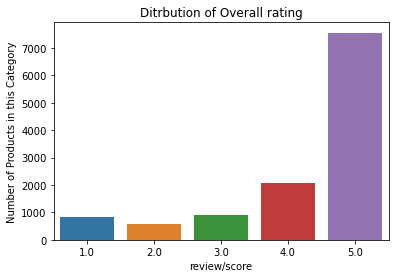

In [9]:
Shoes = Preprocessing(df_shoes)
print(Shoes)
print("extracting the preprocessed Dataframe into a .csv file for further analysis")
Shoes.to_csv(r'D:\Academics\sem 4\Labs\ML_Mini-Project\Preprocessed_datasets\preprocessed_Shoes.csv',index = False)

In [ ]:
## Preprocessing of Arts

The Info of the dataset is: 
<class 'pandas.core.frame.DataFrame'>
Int64Index: 27980 entries, 0 to 27979
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   product/productId   27980 non-null  object
 1   product/title       27980 non-null  object
 2   product/price       27980 non-null  object
 3   review/userId       27980 non-null  object
 4   review/profileName  27980 non-null  object
 5   review/helpfulness  27980 non-null  object
 6   review/score        27980 non-null  object
 7   review/time         27980 non-null  object
 8   review/summary      27980 non-null  object
 9   review/text         27980 non-null  object
dtypes: object(10)
memory usage: 2.3+ MB
None
------------------------------------------------------------------------------------------------------
Removing the duplicate records in the categories: 

-------------------------------------------------------------------------------------

C:\Users\tbala\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


      product/productId                                      product/title  \
7            B000G6HRZE     Dritz(R) Extra Large Safety Pins-Size 3 65/Pkg   
8            B000G6HRZE     Dritz(R) Extra Large Safety Pins-Size 3 65/Pkg   
9            B000G6HRZE     Dritz(R) Extra Large Safety Pins-Size 3 65/Pkg   
10           B000G6HRZE     Dritz(R) Extra Large Safety Pins-Size 3 65/Pkg   
11           B000G6HRZE     Dritz(R) Extra Large Safety Pins-Size 3 65/Pkg   
...                 ...                                                ...   
27975        B000LFEI2K  Makin's USA Clay Cutters, Airplane, 3 Per Package   
27976        B000G6HRT0               Collins Pin Cushion Strawberry Emery   
27977        B000G6HRT0               Collins Pin Cushion Strawberry Emery   
27978        B000MAPM2O  Jolee's Boutique Themed Ornate Dimensional Sti...   
27979        B000MAPM2O  Jolee's Boutique Themed Ornate Dimensional Sti...   

       product/price   review/userId                 review/pro

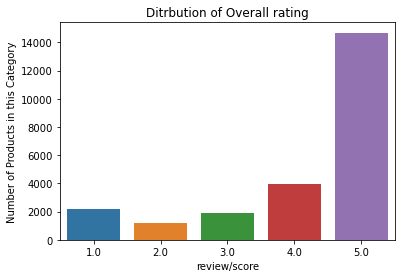

In [11]:
Arts = Preprocessing(df_Arts)
print(Arts)
print("extracting the preprocessed Dataframe into a .csv file for further analysis")
Arts.to_csv(r'D:\Academics\sem 4\Labs\ML_Mini-Project\Preprocessed_datasets\preprocessed_Arts.csv',index = False)

In [ ]:
## Preprocessing of Cell_Phones_&_Accessories

The Info of the dataset is: 
<class 'pandas.core.frame.DataFrame'>
Int64Index: 78930 entries, 0 to 78929
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   product/productId   78930 non-null  object
 1   product/title       78930 non-null  object
 2   product/price       78930 non-null  object
 3   review/userId       78930 non-null  object
 4   review/profileName  78930 non-null  object
 5   review/helpfulness  78930 non-null  object
 6   review/score        78930 non-null  object
 7   review/time         78930 non-null  object
 8   review/summary      78930 non-null  object
 9   review/text         78930 non-null  object
dtypes: object(10)
memory usage: 6.6+ MB
None
------------------------------------------------------------------------------------------------------
Removing the duplicate records in the categories: 

-------------------------------------------------------------------------------------

C:\Users\tbala\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


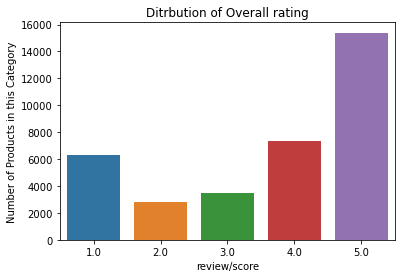

In [17]:
Cell = Preprocessing(df_Cell)
print(Cell)
print("extracting the preprocessed Dataframe into a .csv file for further analysis")
Cell.to_csv(r'D:\Academics\sem 4\Labs\ML_Mini-Project\Preprocessed_datasets\preprocessed_Cellphones_accessories.csv',index = False)

In [41]:
## Preprocessing of Video_Games

The Info of the dataset is: 
<class 'pandas.core.frame.DataFrame'>
Int64Index: 463669 entries, 0 to 463668
Data columns (total 10 columns):
 #   Column              Non-Null Count   Dtype 
---  ------              --------------   ----- 
 0   product/productId   463669 non-null  object
 1   product/title       463669 non-null  object
 2   product/price       463669 non-null  object
 3   review/userId       463669 non-null  object
 4   review/profileName  463669 non-null  object
 5   review/helpfulness  463669 non-null  object
 6   review/score        463669 non-null  object
 7   review/time         463669 non-null  object
 8   review/summary      463669 non-null  object
 9   review/text         463669 non-null  object
dtypes: object(10)
memory usage: 38.9+ MB
None
------------------------------------------------------------------------------------------------------
Removing the duplicate records in the categories: 

----------------------------------------------------------------------

C:\Users\tbala\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


       product/productId                               product/title  \
2             B000068VBQ  Fisher-Price Rescue Heroes: Lava Landslide   
5             B000068VBQ  Fisher-Price Rescue Heroes: Lava Landslide   
62            B000068VBK                       Kelly Club Pet Parade   
63            B000068VBK                       Kelly Club Pet Parade   
64            B000068VBK                       Kelly Club Pet Parade   
...                  ...                                         ...   
463664        B000K5V8GA                                    Platypus   
463665        B000K5V8GA                                    Platypus   
463666        B000K5V8GA                                    Platypus   
463667        B000K5V8GA                                    Platypus   
463668        B000K5V8GA                                    Platypus   

        product/price   review/userId  \
2                8.88  A10P44U29RNOT6   
5                8.88  A226DRVTNFWM28   
62          

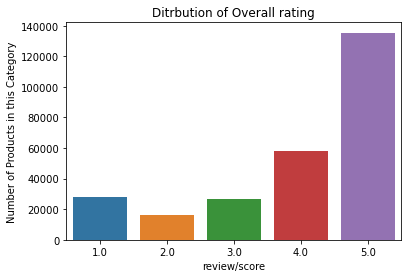

In [19]:
video_games = Preprocessing(df_video_games)
print(video_games)
print("extracting the preprocessed Dataframe into a .csv file for further analysis")
video_games.to_csv(r'D:\Academics\sem 4\Labs\ML_Mini-Project\Preprocessed_datasets\preprocessed_video_games.csv',index = False)

In [ ]:
## Preprocessing of Office_Products

The Info of the dataset is: 
<class 'pandas.core.frame.DataFrame'>
Int64Index: 138084 entries, 0 to 138083
Data columns (total 10 columns):
 #   Column              Non-Null Count   Dtype 
---  ------              --------------   ----- 
 0   product/productId   138084 non-null  object
 1   product/title       138084 non-null  object
 2   product/price       138084 non-null  object
 3   review/userId       138084 non-null  object
 4   review/profileName  138084 non-null  object
 5   review/helpfulness  138084 non-null  object
 6   review/score        138084 non-null  object
 7   review/time         138084 non-null  object
 8   review/summary      138084 non-null  object
 9   review/text         138084 non-null  object
dtypes: object(10)
memory usage: 11.6+ MB
None
------------------------------------------------------------------------------------------------------
Removing the duplicate records in the categories: 

----------------------------------------------------------------------

C:\Users\tbala\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


       product/productId                                      product/title  \
1             B000CD483K  C-Line Clear 62033 Heavyweight Antimicrobial P...   
2             B0006Q9950  Wasp Barcode Technologies 633808920128 Cordles...   
3             B0001YXWV4  Panasonic MARKER ERASER KIT 1 EA-BLK RED BLU E...   
4             B0001YXWV4  Panasonic MARKER ERASER KIT 1 EA-BLK RED BLU E...   
5             B000NW7LWU           Acme Blueprint Business Card Case Holder   
...                  ...                                                ...   
138079        B0006Q994Q  Informatics WASP WWR 2905 PEN SCANNER W/USB ( ...   
138080        B0006Q994Q  Informatics WASP WWR 2905 PEN SCANNER W/USB ( ...   
138081        B0006Q994Q  Informatics WASP WWR 2905 PEN SCANNER W/USB ( ...   
138082        B0006Q994Q  Informatics WASP WWR 2905 PEN SCANNER W/USB ( ...   
138083        B0006Q994Q  Informatics WASP WWR 2905 PEN SCANNER W/USB ( ...   

        product/price   review/userId              

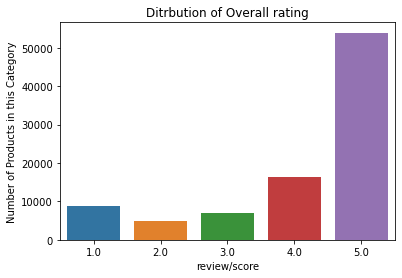

In [21]:
off_prod = Preprocessing(df_off_prod)
print(off_prod)
print("extracting the preprocessed Dataframe into a .csv file for further analysis")
off_prod.to_csv(r'D:\Academics\sem 4\Labs\ML_Mini-Project\Preprocessed_datasets\preprocessed_off_prod.csv',index = False)

In [ ]:
## Preprocessing of Watches

In [51]:
watches = Preprocessing(df_Watches)
print(watches)
print("extracting the preprocessed Dataframe into a .csv file for further analysis")
watches.to_csv(r'D:\Academics\sem 4\Labs\ML_Mini-Project\Preprocessed_datasets\preprocessed_watches.csv',index = False)

The Info of the dataset is: 
<class 'pandas.core.frame.DataFrame'>
Int64Index: 68356 entries, 0 to 68355
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   product/productId   68356 non-null  object
 1   product/title       68356 non-null  object
 2   product/price       68356 non-null  object
 3   review/userId       68356 non-null  object
 4   review/profileName  68356 non-null  object
 5   review/helpfulness  68356 non-null  object
 6   review/score        68356 non-null  object
 7   review/time         68356 non-null  object
 8   review/summary      68356 non-null  object
 9   review/text         68356 non-null  object
dtypes: object(10)
memory usage: 5.7+ MB
None
------------------------------------------------------------------------------------------------------
Removing the duplicate records in the categories: 

-------------------------------------------------------------------------------------

TypeError: 'module' object is not iterable

In [ ]:
## Preprocessing of Electronics

In [ ]:
electronics = Preprocessing(df_electronics)
print(electronics)
print("extracting the preprocessed Dataframe into a .csv file for further analysis")
electronics.to_csv(r'D:\Academics\sem 4\Labs\ML_Mini-Project\Preprocessed_datasets\preprocessed_electronics.csv',index = False)